#Loading Data


In [6]:
from google.colab import files
files = files.upload()

Saving preprocessed_data (1).csv to preprocessed_data (1).csv


In [7]:
import pandas as pd
data = pd.read_csv('preprocessed_data (1).csv')
data.head(10)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
5,ca,mrs,grades_3_5,6,1,math_science history_civics,mathematics socialsciences,it end school year routines run course student...,102.50
6,ca,mrs,grades_3_5,0,1,literacy_language math_science,literacy mathematics,sitting still overrated it makes sense opera m...,1418.08
7,ca,ms,grades_3_5,0,0,math_science history_civics,appliedsciences history_geography,it not enough read book write essay connect de...,495.29
8,ca,ms,grades_prek_2,127,1,literacy_language,esl literacy,never society rapidly changed technology invad...,299.99
9,hi,mrs,grades_3_5,41,1,math_science,appliedsciences mathematics,do remember first time saw star wars wall e ro...,479.94


In [8]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis = 1)
X.head(1)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


#Splitting the Data into Train and Test : Stratified Sampling

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

#Encoding essay Tfidf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['essay'].values) 


X_train_essay_Tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_Tfidf= vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_Tfidf.shape, y_train.shape)
print(X_test_essay_Tfidf.shape, y_test.shape)

After vectorizations
(73196, 258566) (73196,)
(36052, 258566) (36052,)


#Encoding Project_grade_category

In [11]:
vectorizer.fit(X_train['project_grade_category'].values) 


X_train_project_grade_category = vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_grade_category.shape, y_train.shape)
print(X_test_project_grade_category.shape, y_test.shape)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)


#Encoding clean_categories

In [12]:
vectorizer.fit(X_train['clean_categories'].values) 


X_train_clean_categories = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories= vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories.shape, y_train.shape)
print(X_test_clean_categories.shape, y_test.shape)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)


#Encoding clean_subcategories

In [13]:
vectorizer.fit(X_train['clean_subcategories'].values) 


X_train_clean_subcategories = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories= vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories.shape, y_train.shape)
print(X_test_clean_subcategories.shape, y_test.shape)

After vectorizations
(73196, 246) (73196,)
(36052, 246) (36052,)


#Encoding school_state

In [14]:
vectorizer.fit(X_train['school_state'].values) 


X_train_school_state = vectorizer.transform(X_train['school_state'].values)
X_test_school_state= vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state.shape, y_train.shape)
print(X_test_school_state.shape, y_test.shape)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)


#Encoding teacher_prefix

In [15]:
vectorizer.fit(X_train['teacher_prefix'].values) 


X_train_teacher_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix= vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix.shape, y_train.shape)
print(X_test_teacher_prefix.shape, y_test.shape)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)


#Encoding price(numerical feature)

In [16]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


#Encoding teacher_number_of_previously_posted_projects

In [17]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_project_teachers_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_project_teachers_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_project_teachers_norm.shape, y_train.shape)
print(X_test_project_teachers_norm.shape, y_test.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


#Concatinating all features TFidf

In [18]:
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_Tfidf, X_train_clean_categories, X_train_clean_subcategories, X_train_project_teachers_norm, X_train_price_norm,X_train_project_grade_category,X_train_school_state,X_train_teacher_prefix)).tocsr()
X_te1 = hstack((X_test_essay_Tfidf, X_test_clean_categories, X_test_clean_subcategories, X_test_project_teachers_norm, X_test_price_norm,X_test_project_grade_category,X_test_school_state,X_test_teacher_prefix)).tocsr()


print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)

Final Data matrix
(73196, 258924) (73196,)
(36052, 258924) (36052,)


#Implementing Decision Tree on Tfidf(essay)

In [0]:
import math as mt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

Decision_Tree = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[ 1,5,10,50],'min_samples_split':[5,10,50,500]}
clf = RandomizedSearchCV(Decision_Tree, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr1, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [0]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
max_depth= results['param_max_depth']
min_samples_split=results['param_min_samples_split']

In [21]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

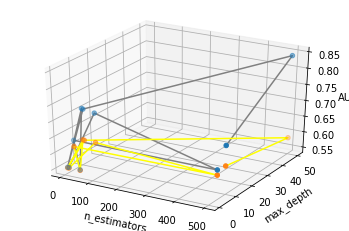

In [22]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(min_samples_split, max_depth, train_auc, cmap="Blue")
ax.plot3D(min_samples_split, max_depth, train_auc, 'gray')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC');
ax.scatter3D(min_samples_split, max_depth, cv_auc, cmap="Green")
ax.plot3D(min_samples_split, max_depth, cv_auc, 'yellow')
plt.show()

In [23]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

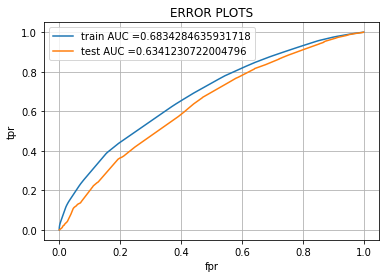

In [25]:
from sklearn.metrics import roc_curve, auc


Model= DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
Model.fit(X_tr1, y_train)

y_train_pred = batch_predict(Model, X_tr1)    
y_test_pred = batch_predict(Model, X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [27]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.39327541908694696 for threshold 0.515
Train confusion matrix
[[ 6981  4102]
 [23332 38781]]
Test confusion matrix
[[ 3219  2240]
 [12332 18261]]


#Implementing Decision Tree for TFidf(essay) on Non-negative Features

In [28]:
from tqdm import tqdm
Model2= DecisionTreeClassifier(min_samples_split=500,class_weight='balanced')
Model2.fit(X_tr1,y_train)
feature_importance=Model2.feature_importances_
#print(np.count_nonzero(feature_importance))
index=[]
for i in tqdm(range(len(feature_importance))):
    if(feature_importance[i]!=0):
        index.append(i)
print(len(index))

100%|██████████| 258924/258924 [00:00<00:00, 1396729.37it/s]

1144


In [0]:
X_tr_fp=X_tr1[:,index]

In [0]:
X_te_fp=X_te1[:,index]

In [0]:
clf.fit(X_tr_fp, y_train)

results2= pd.DataFrame.from_dict(clf.cv_results_)
train_auc2= results2['mean_train_score']
train_auc_std2= results2['std_train_score']
cv_auc2 = results2['mean_test_score'] 
cv_auc_std2= results2['std_test_score']
max_depth2= results2['param_max_depth']
min_samples_split2=results2['param_min_samples_split']

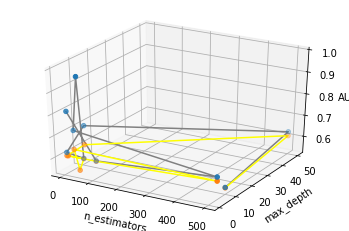

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(min_samples_split, max_depth, train_auc2, cmap="Blue")
ax.plot3D(min_samples_split, max_depth, train_auc2, 'gray')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC');
ax.scatter3D(min_samples_split, max_depth, cv_auc2, cmap="Green")
ax.plot3D(min_samples_split, max_depth, cv_auc2, 'yellow')
plt.show()

In [33]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

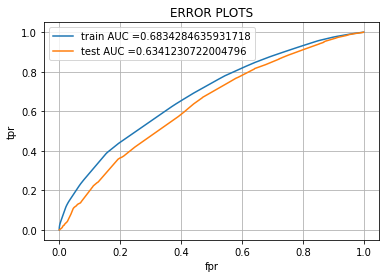

In [34]:
Model2= DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
Model2.fit(X_tr_fp, y_train)

y_train_pred_fp= batch_predict(Model2, X_tr_fp)    
y_test_pred_fp= batch_predict(Model2, X_te_fp)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred_fp)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred_fp)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [35]:
best_t3= find_best_threshold(tr_thresholds3, train_fpr3, train_tpr3)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_fp, best_t3)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_fp, best_t3)))

the maximum value of tpr*(1-fpr) 0.39327541908694696 for threshold 0.515
Train confusion matrix
[[ 6981  4102]
 [23332 38781]]
Test confusion matrix
[[ 3219  2240]
 [12332 18261]]


#Implementing Decision Tree on TFidf w2v

In [36]:
from google.colab import files
files = files.upload()

Saving glove_vectors (1) to glove_vectors (1)


In [0]:
import pickle
with open('glove_vectors (1)', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [42]:
from tqdm import tqdm
tfidf_w2v_vectors = []; 
for sentence in tqdm(X_train['essay'].values): 
    vector = np.zeros(300) 
    tf_idf_weight =0; 
    for word in sentence.split(): 
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
           
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            vector += (vec * tf_idf) 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 73196/73196 [02:27<00:00, 496.77it/s]

73196
300


In [39]:
tfidf_w2v_test = []; 
for sentence in tqdm(X_test['essay'].values): 
    vector = np.zeros(300) 
    tf_idf_weight =0; 
    for word in sentence.split(): 
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
           
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            vector += (vec * tf_idf) 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test.append(vector)

print(len(tfidf_w2v_test))
print(len(tfidf_w2v_test[0]))

100%|██████████| 36052/36052 [01:10<00:00, 508.82it/s]

36052
300


In [45]:
X_tr1_w2v= hstack((tfidf_w2v_vectors, X_train_clean_categories, X_train_clean_subcategories, X_train_project_teachers_norm, X_train_price_norm,X_train_project_grade_category,X_train_school_state,X_train_teacher_prefix)).tocsr()
X_te1_w2v= hstack((tfidf_w2v_test, X_test_clean_categories, X_test_clean_subcategories, X_test_project_teachers_norm, X_test_price_norm,X_test_project_grade_category,X_test_school_state,X_test_teacher_prefix)).tocsr()


print("Final Data matrix")
print(X_tr1_w2v.shape, y_train.shape)
print(X_te1_w2v.shape, y_test.shape)

Final Data matrix
(73196, 658) (73196,)
(36052, 658) (36052,)


In [0]:
Model1=DecisionTreeClassifier(max_depth=5,min_samples_split=50,class_weight='balanced')

In [0]:
clf.fit(X_tr1_w2v, y_train)

results1= pd.DataFrame.from_dict(clf.cv_results_)
train_auc1= results1['mean_train_score']
train_auc_std1= results1['std_train_score']
cv_auc1= results1['mean_test_score'] 
cv_auc_std1= results1['std_test_score']
max_depth1= results1['param_max_depth']
min_samples_spli1t=results1['param_min_samples_split']

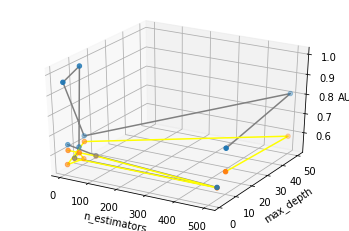

In [50]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(min_samples_split, max_depth, train_auc1, cmap="Blue")
ax.plot3D(min_samples_split, max_depth, train_auc1, 'gray')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('AUC');
ax.scatter3D(min_samples_split, max_depth, cv_auc1, cmap="Green")
ax.plot3D(min_samples_split, max_depth, cv_auc1, 'yellow')
plt.show()

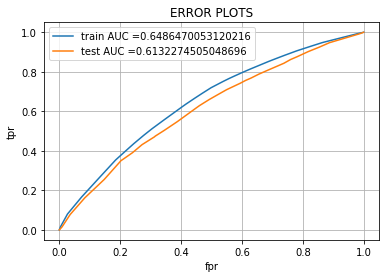

In [51]:
Model1.fit(X_tr1_w2v,y_train)
y_train_pred1 = batch_predict(Model1, X_tr1_w2v)    
y_test_pred1= batch_predict(Model1, X_te1_w2v)

train_fpr1, train_tpr1, tr_thresholds1= roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [52]:
best_t1= find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t1)))

the maximum value of tpr*(1-fpr) 0.37158582123854766 for threshold 0.52
Train confusion matrix
[[ 6463  4620]
 [22534 39579]]
Test confusion matrix
[[ 2945  2514]
 [11357 19236]]


#Implementing WordCLoud

In [0]:
def get_false_index(y_pred,y):
    l=[]
    for i in range(len(y)):
        if(y[i]==0 and y_pred[i]==1):
            l.append(i)
    return l

In [0]:
y_pred=predict_with_best_t(y_train_pred,best_t)

In [0]:
false_index=get_false_index(y_pred,y_train)

In [0]:
X=X_train.iloc[false_index,6]

100%|██████████| 4102/4102 [04:15<00:00, 16.07it/s]


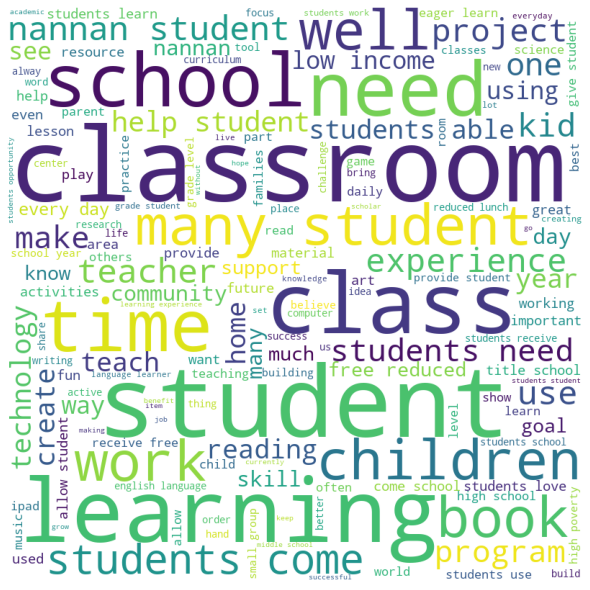

In [58]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
   
for val in tqdm(X): 
    val = str(val) 
  
    tokens = val.split() 
       
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        if((words.isdigit())==False):
            comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


#Boxplot of price feature for false positive points

In [0]:
X_price_fp=X_train.iloc[false_index,7]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



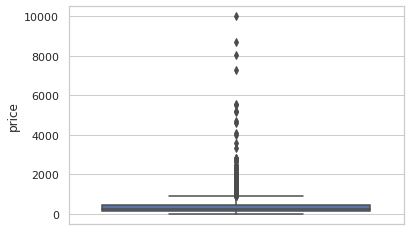

In [60]:
import seaborn as sns
sns.set(style="whitegrid")
ax=sns.boxplot(y=X_price_fp)

#Pdf of teacher_number_of_previously_posted_projects for false positive points

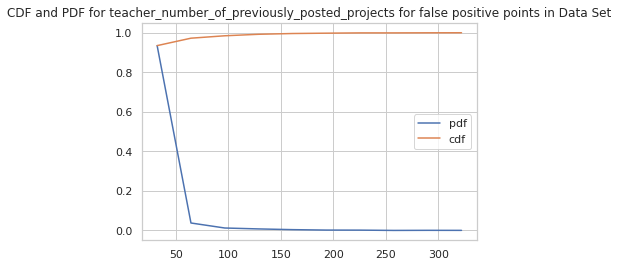

In [61]:
X_teachers_fp=X_train.iloc[false_index,3]
counts, bin_edges = np.histogram(X_teachers_fp, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.title('CDF and PDF for teacher_number_of_previously_posted_projects for false positive points in Data Set')
plt.legend()

#PrettyTable

In [0]:
from prettytable import PrettyTable

In [0]:
x=PrettyTable()
x.field_names=["Vectorizer","Model","max_depth","min_samples_spli1t","AUC"]
x.add_row(["Tfidf","Decision Tree Classifier","10","500","0.6288"])
x.add_row(["Tfidf_w2v","Decision Tree Classifier","5","50","0.6254"])

In [64]:
print(x)

+------------+--------------------------+-----------+--------------------+--------+
| Vectorizer |          Model           | max_depth | min_samples_spli1t |  AUC   |
+------------+--------------------------+-----------+--------------------+--------+
|   Tfidf    | Decision Tree Classifier |     10    |        500         | 0.6288 |
| Tfidf_w2v  | Decision Tree Classifier |     5     |         50         | 0.6254 |
+------------+--------------------------+-----------+--------------------+--------+
